# Machine Learning Assignment No.4
## _Implement K-Nearest Neighbors algorithm on diabetes.csv dataset. Compute confusion matrix, accuracy, error rate, precision and recall on the given dataset._
                                                                                       Author: Akib Faras
                                                                                       BE Computer Engineering

### _Importing Essential Libraries._

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## 1. Data Pre-processing.

### _Getting the Dataset_

In [4]:
df = pd.read_csv("diabetes.csv", index_col = 0)

df.head()


,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
Pregnancies,,,,,,,,
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1


### Standardize the Variables.

In [6]:
from sklearn.preprocessing import StandardScaler
 
scaler = StandardScaler()
 
scaler.fit(df.drop('Outcome', axis = 1))
scaled_features = scaler.transform(df.drop('Outcome', axis = 1))
 
df_feat = pd.DataFrame(scaled_features, columns = df.columns[:-1])
df_feat.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age
0,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


## 2.Train Test Split Data and Use KNN model from sklearn library

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features, df['Outcome'], test_size = 0.30)

## 3.Using K-NN Classifier.

In [12]:
from sklearn.neighbors import KNeighborsClassifier
 
knn = KNeighborsClassifier(n_neighbors = 1)
 
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

### predicting and creating a Confusion Matrix.

In [13]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, pred))
 
print(classification_report(y_test, pred))

[[117  31]
 [ 40  43]]
              precision    recall  f1-score   support

           0       0.75      0.79      0.77       148
           1       0.58      0.52      0.55        83

    accuracy                           0.69       231
   macro avg       0.66      0.65      0.66       231
weighted avg       0.69      0.69      0.69       231



### Choosing a K Value

Text(0, 0.5, 'Error Rate')

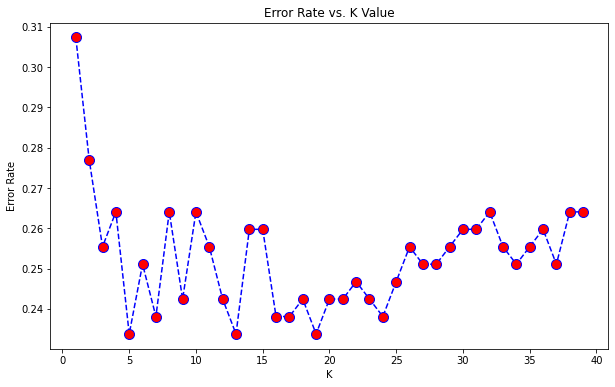

In [15]:
error_rate = []
for i in range(1, 40):
     
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
 
plt.figure(figsize =(10, 6))
plt.plot(range(1, 40), error_rate, color ='blue',
                linestyle ='dashed', marker ='o',
         markerfacecolor ='red', markersize = 10)
 
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

## Output: 
### Here, we can see that  roughly after K>6 the error rate just tends to hover between 0.25-0.26 Let’s retrain the model with that and check the classification report. 

In [16]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K = 1
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print('WITH K = 1')
print('\n')
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

WITH K = 1


[[117  31]
 [ 40  43]]


              precision    recall  f1-score   support

           0       0.75      0.79      0.77       148
           1       0.58      0.52      0.55        83

    accuracy                           0.69       231
   macro avg       0.66      0.65      0.66       231
weighted avg       0.69      0.69      0.69       231



In [21]:
# NOW WITH K = 6
knn = KNeighborsClassifier(n_neighbors = 6)
 
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
 
print('WITH K = 6')
print('\n')
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

WITH K = 15


[[134  14]
 [ 44  39]]


              precision    recall  f1-score   support

           0       0.75      0.91      0.82       148
           1       0.74      0.47      0.57        83

    accuracy                           0.75       231
   macro avg       0.74      0.69      0.70       231
weighted avg       0.75      0.75      0.73       231



### Great! We were able to squeeze some more performance out of our model by tuning to a better K value.